# Минипроект № 2 курса "Аналитик данных" школы karpov.courses
Задачи:
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиальные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

# Описание данных
user_data:
client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст

logs:
client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unix

# Инструкции

1.Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [6]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [7]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
logs.platform.nunique()

3

2. Какой клиент совершил больше всего успешных операций? (success == True)

In [10]:
logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform': 'count'}) \
    .sort_values(['platform', 'client'], ascending=[False, True]) \
    .rename(columns={'platform': 'number_of_operations'}) \
    .head(10)

,client,number_of_operations
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41
1826,64064,40


3. С какой платформы осуществляется наибольшее количество успешных операций?

In [12]:
logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'client': 'count'}) \
    .rename(columns={'client': 'number_of_operations'})

,platform,number_of_operations
0,computer,1090
1,phone,2019
2,tablet,180


4. Какую платформу предпочитают премиальные клиенты?

In [14]:
user_data_logs = logs.merge(user_data)

In [15]:
user_data_logs.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [19]:
user_data_logs.query('success == True and premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'client': 'count'}) \
    .rename(columns={'client': 'number_of_premium_clients'}) \
    .sort_values('number_of_premium_clients', ascending=False)

,platform,number_of_premium_clients
1,phone,177
0,computer,108
2,tablet,18


5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

C:\Users\ustan\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ustan\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


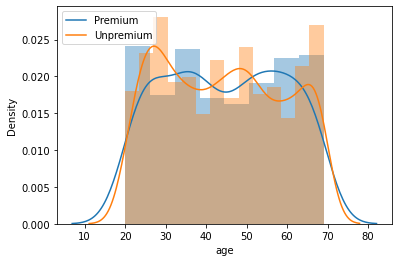

In [23]:
sns.distplot(user_data_logs.query('premium == True').age)
sns.distplot(user_data_logs.query('premium == False').age)
plt.legend(labels = ['Premium','Unpremium'],loc = 'upper left')

6. Постройте график распределения числа успешных операций

x – число успешных операций,
y – число клиентов, совершивших такое количество успешных операций

In [31]:
clients_on_success = user_data_logs.groupby('client') \
                                   .agg({'success': 'sum'})

C:\Users\ustan\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

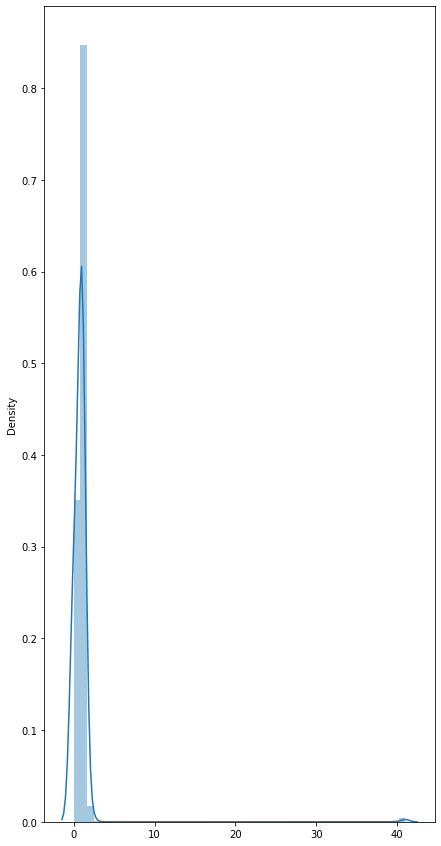

In [49]:
plt.figure(figsize=(7, 15)) 
sns.distplot(clients_on_success)


7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [25]:
clients_on_computer_success = user_data_logs.query('platform == "computer" and success == True').age

C:\Users\ustan\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

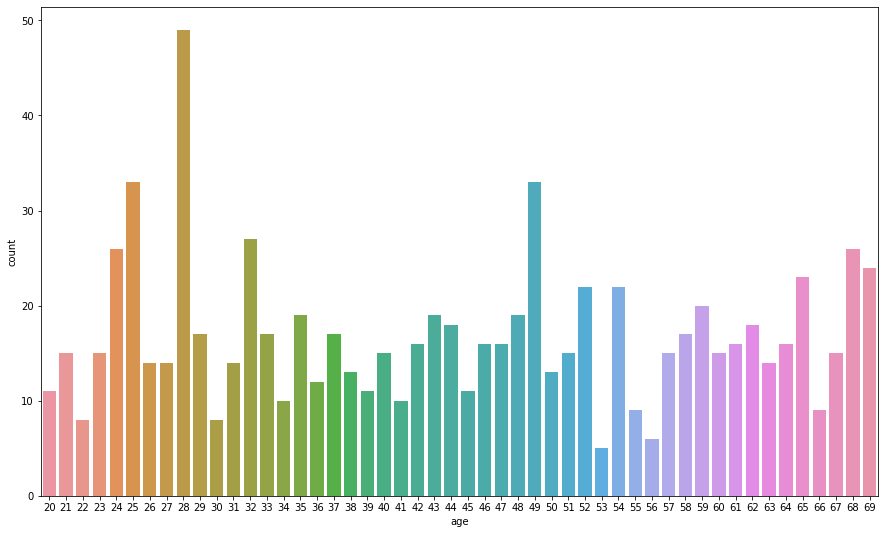

In [71]:
plt.figure(figsize=(15, 9)) 
sns.countplot(clients_on_computer_success)